# **Laptop Price Prediction**

# Importing Necessary Libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Loading the data

In [5]:
data = pd.read_csv('/content/laptop_prices.csv')
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# Information Related to Data

In [6]:
data.shape

(1275, 23)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [8]:
data.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [9]:
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


# Exploratory Data Analysis

<Axes: xlabel='Company'>

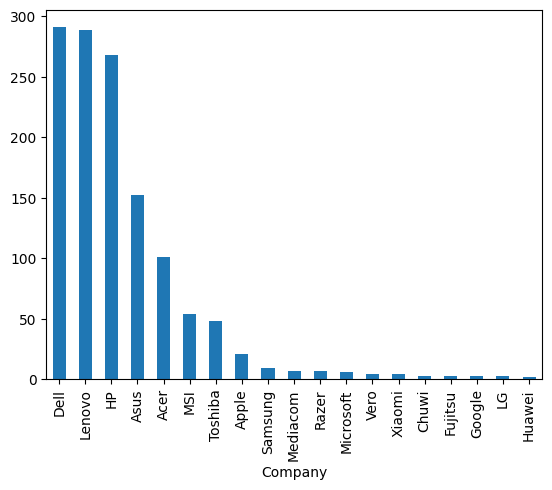

In [10]:
data['Company'].value_counts().plot(kind = 'bar')

<Axes: xlabel='OS'>

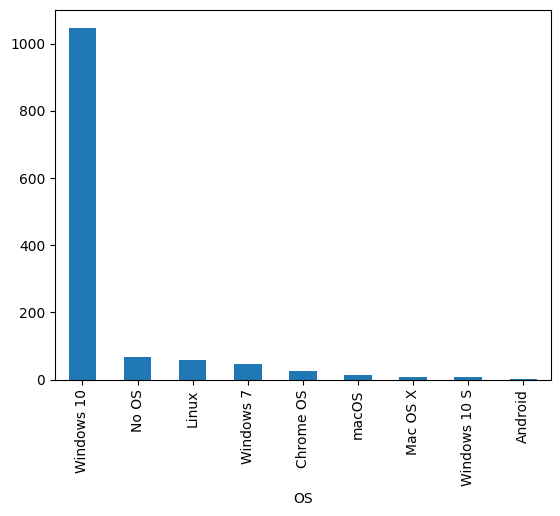

In [11]:
data['OS'].value_counts().plot(kind = 'bar' , x = data['OS'])

<Axes: title={'center': 'TouchScreen'}, ylabel='count'>

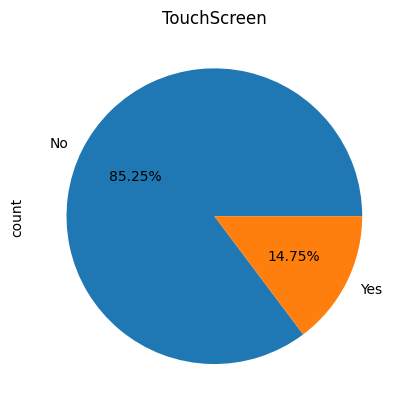

In [12]:
data['Touchscreen'].value_counts().plot(kind = 'pie', autopct = '%.2f%%' , title = 'TouchScreen')

<Axes: xlabel='Ram'>

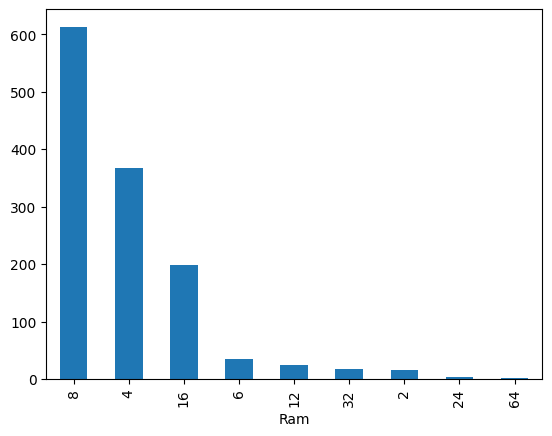

In [13]:
data['Ram'].value_counts().plot(kind = 'bar')

<Axes: title={'center': 'CPU_Company'}, ylabel='count'>

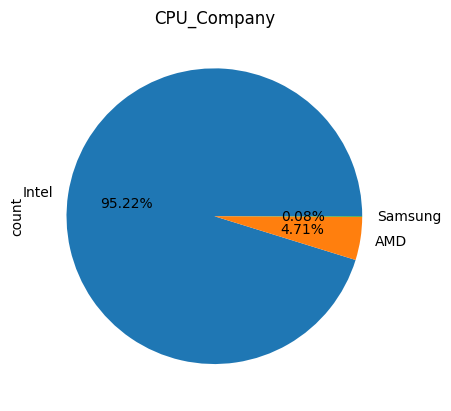

In [14]:
data['CPU_company'].value_counts().plot(kind = 'pie' , autopct  = '%.2f%%', title = 'CPU_Company')

<Axes: title={'center': 'GPU_Company'}, ylabel='count'>

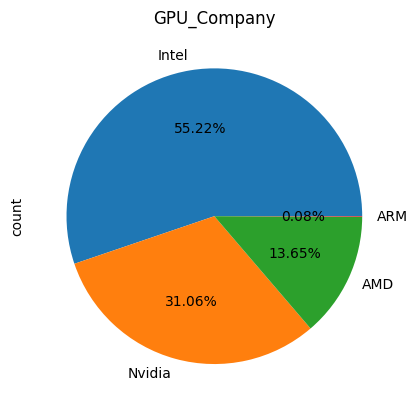

In [15]:
data['GPU_company'].value_counts().plot(kind = 'pie' , autopct  = '%.2f%%', title = 'GPU_Company')

<Axes: ylabel='count'>

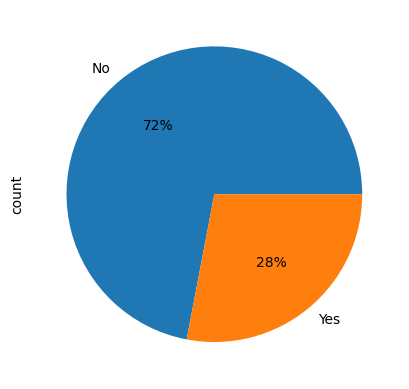

In [16]:
data['IPSpanel'].value_counts().plot(kind = 'pie' , autopct = '%.f%%')

<Axes: xlabel='Inches'>

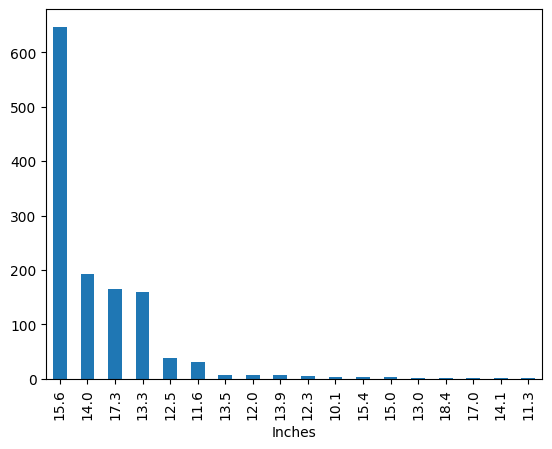

In [17]:
data['Inches'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

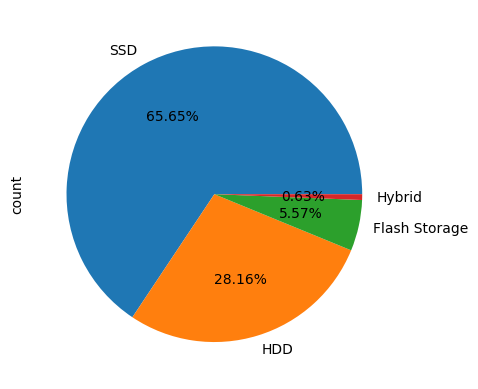

In [18]:
data['PrimaryStorageType'].value_counts().plot(kind = 'pie' , autopct = '%.2f%%')

<Axes: xlabel='Screen'>

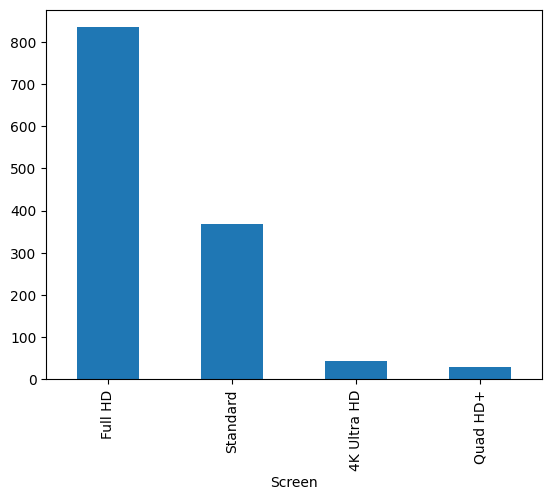

In [19]:
data['Screen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='SecondaryStorageType'>

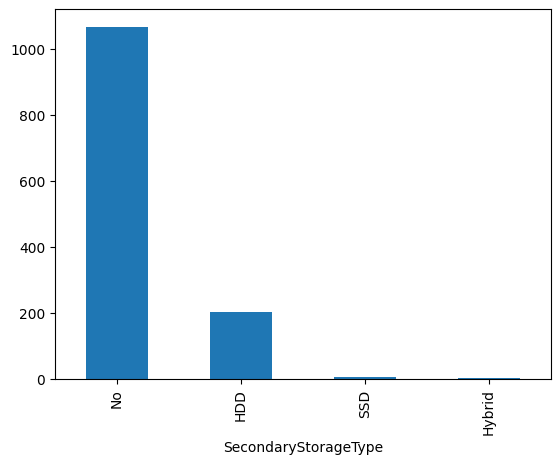

In [20]:
data['SecondaryStorageType'].value_counts().plot(kind = 'bar')

# Bivariate Analysis

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

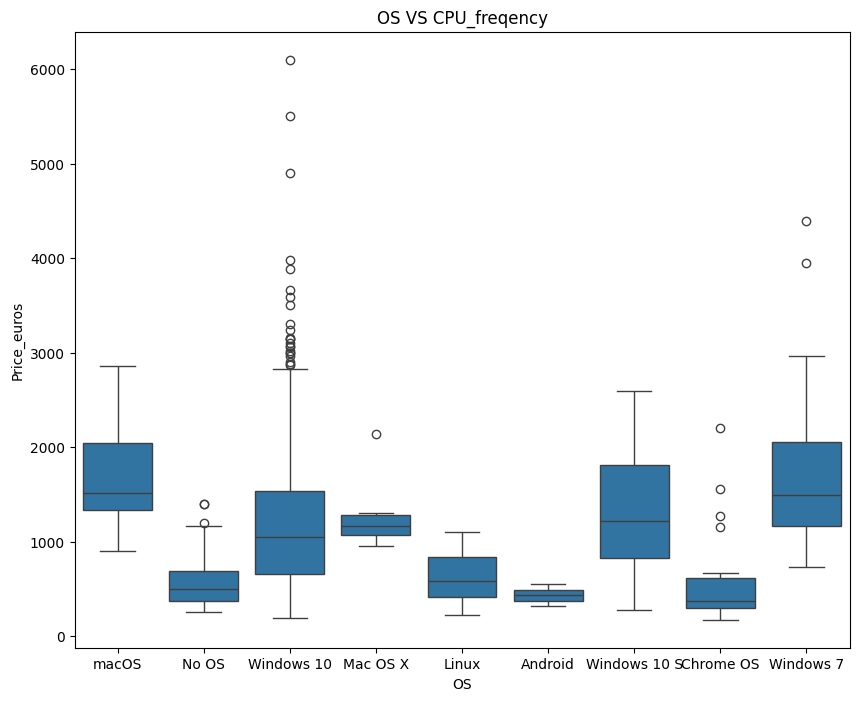

In [22]:
plt.figure(figsize = (10,8))
sns.boxplot(x = data['OS'], y= data['Price_euros'])
plt.title('OS VS CPU_freqency')
plt.show()

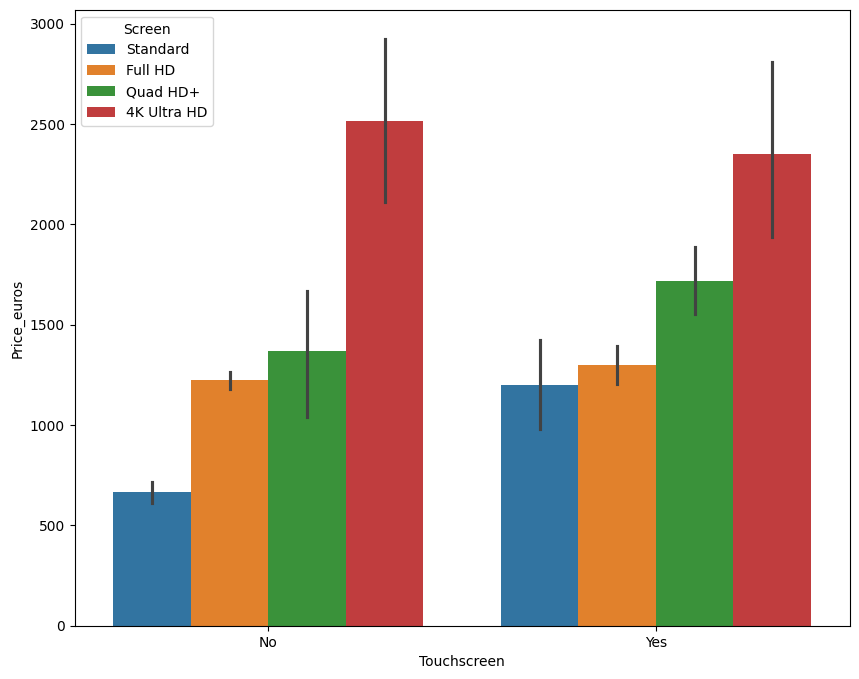

In [23]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['Touchscreen'], y= data['Price_euros'] , hue = data['Screen'])
plt.show()

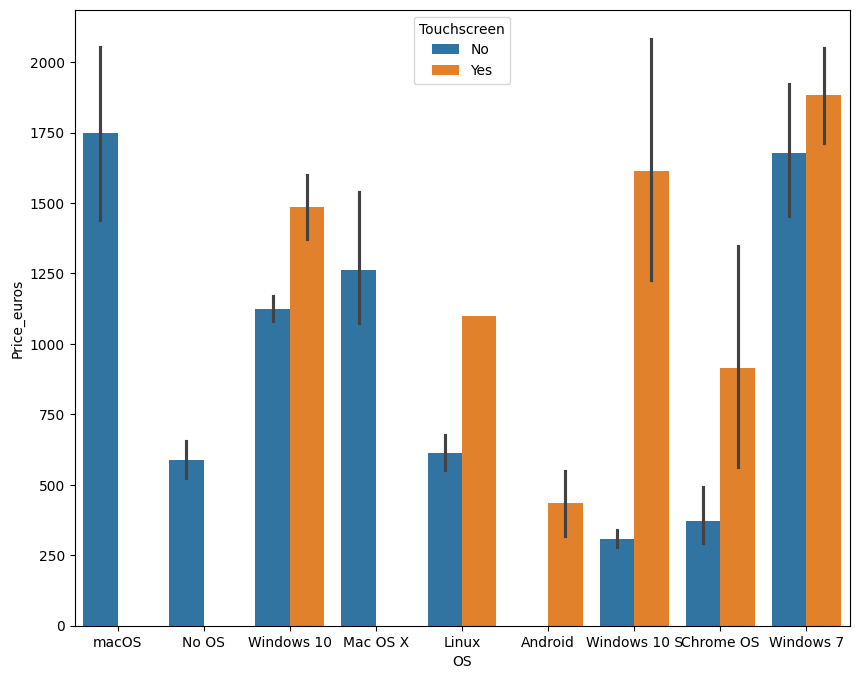

In [24]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['OS'], y= data['Price_euros'] , hue = data['Touchscreen'])
plt.show()

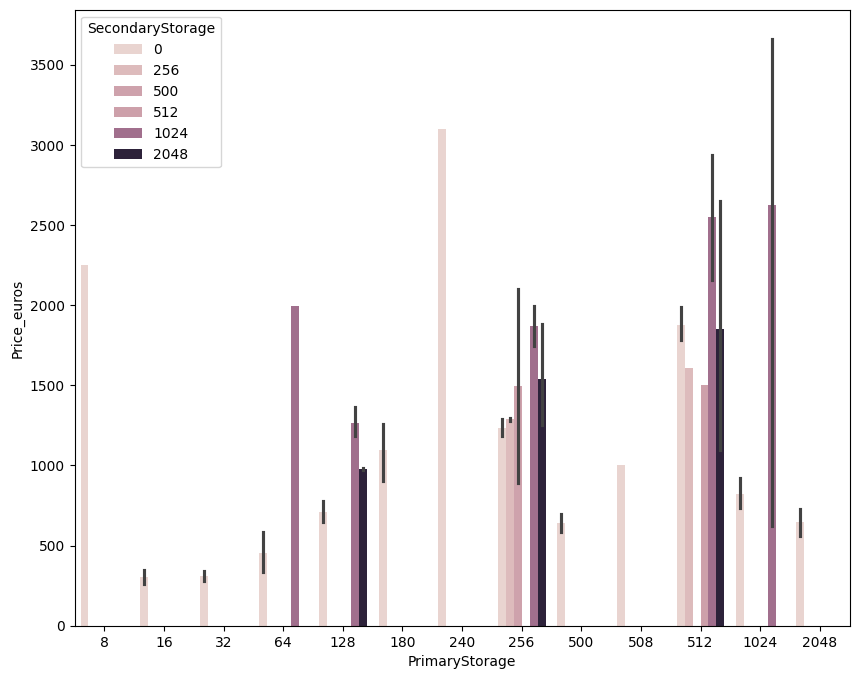

In [25]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['PrimaryStorage'], y= data['Price_euros'] , hue = data['SecondaryStorage'])
plt.show()

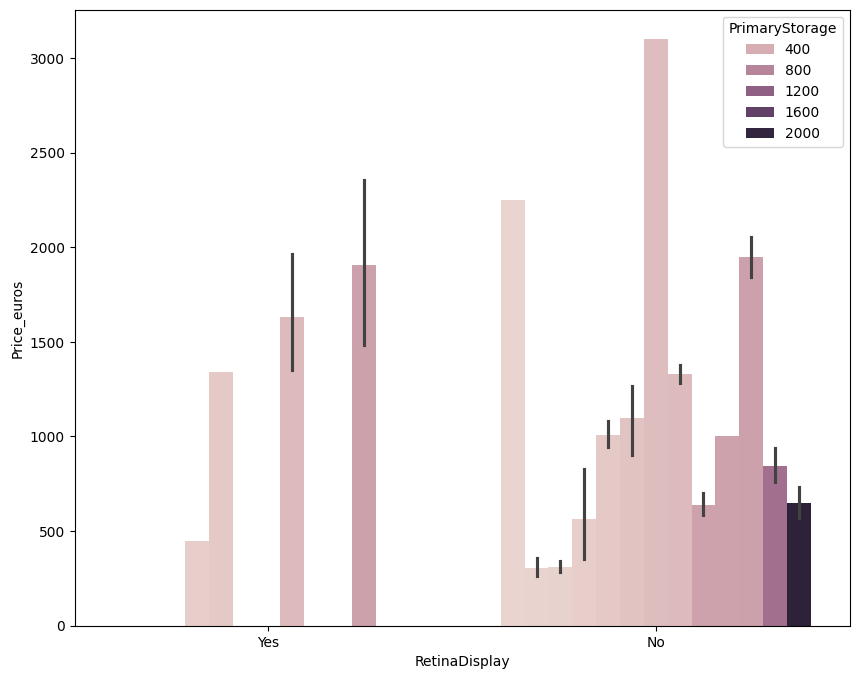

In [26]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['RetinaDisplay'], y= data['Price_euros'], hue = data['PrimaryStorage'])
plt.show()

<Axes: xlabel='CPU_freq', ylabel='Ram'>

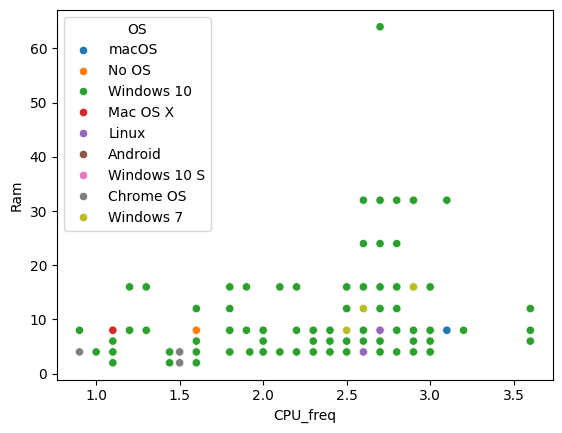

In [27]:
sns.scatterplot(data = data , x= data['CPU_freq'], y = data['Ram'], hue = data['OS'])

<Axes: xlabel='CPU_freq', ylabel='Ram'>

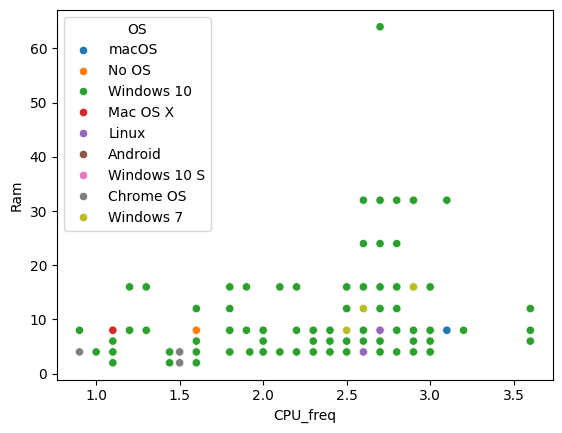

In [28]:
sns.scatterplot(data = data , x= data['CPU_freq'], y = data['Ram'], hue = data['OS'])

In [36]:
# Label Encoding

le = LabelEncoder()
data['Company'] = le.fit_transform(data['Company'])
data['Product'] = le.fit_transform(data['Product'])
data['TypeName'] = le.fit_transform(data['TypeName'])
data['OS'] = le.fit_transform(data['OS'])
data['Screen'] = le.fit_transform(data['Screen'])
data['Touchscreen'] = le.fit_transform(data['Touchscreen'])
data['IPSpanel'] = le.fit_transform(data['IPSpanel'])
data['RetinaDisplay'] = le.fit_transform(data['RetinaDisplay'])
data['CPU_company'] = le.fit_transform(data['CPU_company'])
data['CPU_model'] = le.fit_transform(data['CPU_model'])
data[ 'PrimaryStorageType'] = le.fit_transform(data[ 'PrimaryStorageType'])
data['SecondaryStorageType'] = le.fit_transform(data['SecondaryStorageType'])
data['GPU_company'] = le.fit_transform(data['GPU_company'])
data['GPU_model'] = le.fit_transform(data['GPU_model'])

data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,13.3,8,8,1.37,1339.69,3,2560,...,1,1,2.3,40,128,0,3,2,2,60
1,1,301,4,13.3,8,8,1.34,898.94,3,1440,...,0,1,1.8,40,128,0,0,2,2,53
2,7,50,3,15.6,8,4,1.86,575.00,1,1920,...,0,1,2.5,46,256,0,3,2,2,55
3,1,300,4,15.4,16,8,1.83,2537.45,3,2880,...,1,1,2.7,54,512,0,3,2,0,80
4,1,300,4,13.3,8,8,1.37,1803.60,3,2560,...,1,1,3.1,40,256,0,3,2,2,61


In [37]:
y = data['Price_euros']
x = data.drop('Price_euros',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [40]:
rf = RandomForestRegressor(n_estimators = 700)
model = rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.8320584769573742

In [44]:
y_pred = model.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 88695.98437249968
R2 Score: 0.8320584769573742


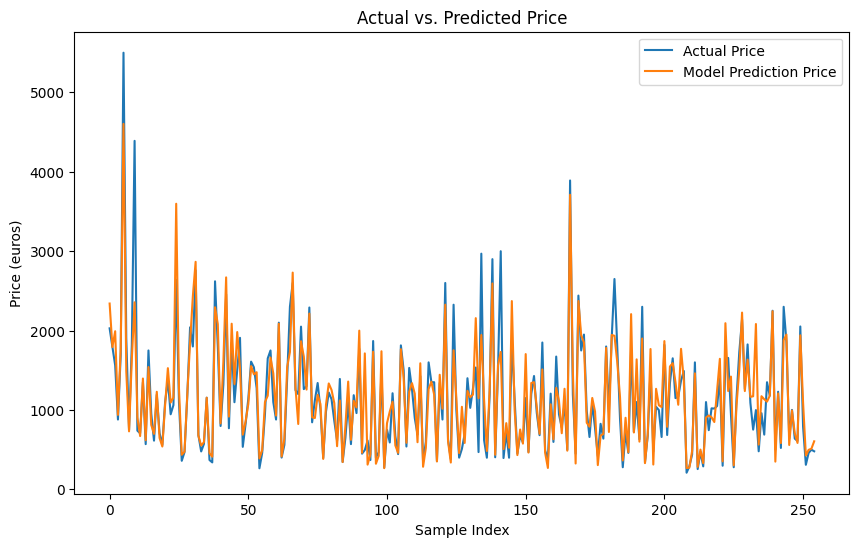

In [42]:
y_pred = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Model Prediction Price')
plt.title('Actual vs. Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Price (euros)')
plt.legend()
plt.show()

# **Thank You**